<a href="https://colab.research.google.com/github/RYU-MCFLY/Aplicaciones-Financieras/blob/main/Semana2_1_Aps_Financieras5_Intro_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana2/1_Intro_Keras.ipynb)

# Dependencias

In [ ]:
# Puede no ser necesaria si ya tienen instalado plotly
# !pip install -U plotly

In [6]:
!pip install pandas=='1.5.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd

In [8]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns

In [10]:
pio.templates.default = 'plotly_white'

# Datos

Utilizaremos los mismo datos de la clase pasada

https://www.kaggle.com/mlg-ulb/creditcardfraud/data


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv("/content/drive/MyDrive/semana3/creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [13]:
# El resultado seria 'False' si NO hay valores nulos y sería 'True' si SI hay valores nulos
df.isnull().values.any()

False

In [14]:
# 0: Normal
# 1: Fraudulento

print(df.Class.value_counts())
df.Class.value_counts() / len(df)

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64

In [15]:
df[df.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
df.loc[:, 'V1':'Amount']

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.251412 -0.018307   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.524980  0.247998   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.475829  0.213454   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.059616  0.214205   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.001396  0.232045   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.127434  0.265245   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 29 columns]

In [18]:
# Separación de características
X = df.iloc[:, 1:-1]
X

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.251412 -0.018307   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.524980  0.247998   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.475829  0.213454   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.059616  0.214205   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.001396  0.232045   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.127434  0.265245   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 29 columns]

In [19]:
# Variables objetivos
y = df.Class
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
import matplotlib.pyplot as plt

In [21]:
normal_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

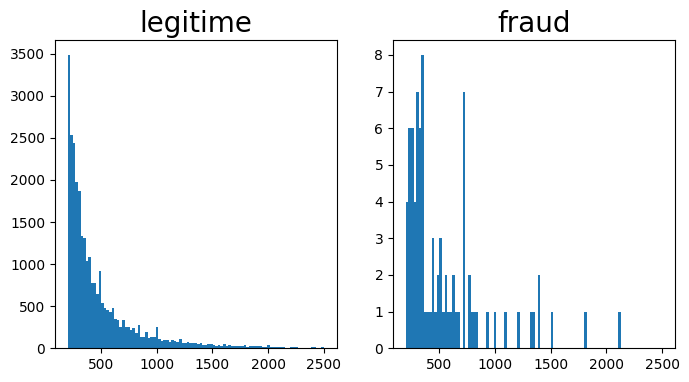

In [22]:
bins = np.linspace(200, 2500, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax = axes.ravel()

ax[0].hist(normal_df.Amount, bins, alpha=1, label='Normal')
ax[0].set_title('legitime', fontsize=20)

ax[1].hist(fraud_df.Amount, bins, alpha=1, label='Fraud')
ax[1].set_title('fraud', fontsize=20)
plt.show()

## División en conjuntos de entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # train_size=0.8

## Estandarización

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

pd.DataFrame(X_train_norm)

0         1         2         3         4         5         6   \
0      -1.882092 -1.321882  1.413661 -0.078190  3.842890 -2.487747 -3.797281   
1       0.655471  0.283548 -0.681282  0.244626  0.695658  0.121106  0.152782   
2       0.417917 -0.724065  1.101337  0.704757 -1.112392  1.108552 -1.167868   
3      -0.393107  0.698743  0.557529 -0.204796 -0.004891 -0.103585  0.206754   
4       1.011442 -0.203541 -0.275393  0.259687 -0.260944 -0.009996 -0.472747   
...          ...       ...       ...       ...       ...       ...       ...   
227840 -0.498418  0.686418 -0.368985 -0.333457 -0.089375 -0.864715  0.226927   
227841 -0.541145  0.150146  1.758138 -1.302883  0.007429  1.070212 -0.307949   
227842 -0.770340  0.496985  0.560356  0.223067  0.363526 -0.251119  0.223270   
227843 -0.701165  0.866263  1.039118  1.332136 -0.137584  0.676139 -0.039435   
227844  1.056015 -0.055230 -0.748553  0.271673 -0.087986 -0.856513  0.116459   

              7         8         9   ...        19        20        21  \
0      -0.568938  1.094824  0.114291  ... -1.993085  0.386647 -2.328849   
1       0.044256 -0.305099 -0.430260  ... -0.067691 -0.202250 -0.501436   
2       0.599177  1.777109 -0.359421  ...  0.023113  0.224459  0.921722   
3       0.485315 -0.650545 -0.335619  ...  0.047422 -0.250661 -0.937408   
4      -0.005193  1.161319 -0.197651  ... -0.148089  0.275192  1.190355   
...          ...       ...       ...  ...       ...       ...       ...   
227840  0.535888 -0.267268 -0.699159  ... -0.369507 -0.225705 -0.812713   
227841  0.520576  2.219066 -1.596161  ... -0.097237 -0.353466 -0.100697   
227842  0.492848 -0.997863  0.131085  ... -0.327362  0.134611  0.213420   
227843  0.560588 -0.405928  0.288001  ... -0.213542  0.274007  0.907403   
227844 -0.247885  0.577742  0.084692  ... -0.333831 -0.418898 -1.064749   

              22        23        24        25        26        27        28  
0      -9.647839  1.638404 -1.675855 -1.398267  1.299000  0.949199 -0.253870  
1      -0.373690 -2.357068  1.250908  0.963353 -0.056481  0.028267 -0.351230  
2      -0.372000 -0.383126  0.493360  1.536022  0.103691  0.087683  0.147987  
3      -0.060740 -0.874354 -0.185713  0.224021  0.312711  0.119248 -0.274001  
4       0.212749  1.091903 -0.066409 -0.498428  0.118153 -0.084258 -0.314142  
...          ...       ...       ...       ...       ...       ...       ...  
227840  0.469907 -0.152864 -0.839331  0.296614 -0.217655 -0.370372 -0.318200  
227841 -0.755499 -1.795225  0.797562  2.551335  0.477538  0.220829 -0.342550  
227842  0.342860 -0.578117 -0.088472  1.671924  0.116622  0.144829 -0.296181  
227843 -0.224534 -0.674347 -0.137185  0.253450 -0.271237  0.412764 -0.232694  
227844  0.534122 -0.206671 -0.572275  0.428484 -0.183616 -0.186631 -0.349100  

[227845 rows x 29 columns]

"If you torture the data long enough, it will confess" Ronald H. Coase

# Modelo

## Configuración del modelo

In [25]:
input_dim = X_train_norm.shape[1] # Número de columnas: 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) 
learning_rate = 1e-5

In [26]:
hidden_dim

7

In [27]:
print(f'{1e-5: .9f}')

 0.000010000


## Arquitectura de la red

In [28]:
# Hiperparámetros muy importantes:
# - learning rate
# - batch size

In [29]:
# Creación de las capas del modelo
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder2 = Dense(hidden_dim, activation="relu")(encoder)

decoder = Dense(hidden_dim, activation='relu')(encoder2)
decoder_f = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder_f)

In [30]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 14)                420       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 29)                232       
                                                                 
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [31]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer='adam')

### Con las lineas de abajo pueden decidir que epoca de entrenamiento guardar

# cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                save_best_only=True,
#                                verbose=0)

## Entrenamiento

In [32]:
history = autoencoder.fit(X_train_norm, X_train_norm,
                          epochs=100,
                          batch_size=2048,
                          shuffle = True,
                          validation_split=.2,
                          verbose=1, 
                        #   callbacks = cp
                          ).history

Epoch 1/100
90/90 [==============================] - 2s 9ms/step - loss: 0.9969 - val_loss: 0.9751
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.9722 - val_loss: 0.9545
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 0.9419 - val_loss: 0.9149
Epoch 4/100
90/90 [==============================] - 1s 7ms/step - loss: 0.9036 - val_loss: 0.8821
Epoch 5/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8728 - val_loss: 0.8535
Epoch 6/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8493 - val_loss: 0.8355
Epoch 7/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8335 - val_loss: 0.8218
Epoch 8/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8225 - val_loss: 0.8134
Epoch 9/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8156 - val_loss: 0.8079
Epoch 10/100
90/90 [==============================] - 1s 7ms/step - loss: 0.8114 - val_loss: 0.8042
Epoch 11/

In [33]:
# Comando para recuperar los datos guardados del modelos, en este caso se guardaria la mejor epoca nada mas

# autoencoder = load_model('autoencoder_fraud.h5')

## Evaluación

In [34]:
# Grafica de la pérdida del modelo en el tiempo
fig = go.Figure()
fig.add_trace(go.Scatter(y = history['loss'], name = 'loss'))
fig.add_trace(go.Scatter(y = history['val_loss'], name = 'val_loss'))
fig.update_layout(
    title = 'Pérdida del modelo',
    xaxis_title = 'Época (epoch)', 
    yaxis_title = 'Pérdida (MSE)'
)
fig.show()

In [35]:
X_test_norm = scaler.transform(X_test)
X_test_pred = autoencoder.predict(X_test_norm)

# Error cuadratico medio, a mano
mse = mean_squared_error(X_test_norm.T, X_test_pred.T, multioutput = 'raw_values')
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

1781/1781 [==============================] - 6s 3ms/step


Reconstruction_error   True_class
count          56962.000000  56962.00000
mean               0.725666      0.00165
std                2.340465      0.04059
min                0.074582      0.00000
25%                0.296930      0.00000
50%                0.443709      0.00000
75%                0.684450      0.00000
max              153.484067      1.00000

In [36]:
error_df

Reconstruction_error  True_class
168367              0.289308           0
110270              0.388562           0
243562              0.838558           0
74702               0.626753           0
98416               0.182021           0
...                      ...         ...
201941              0.558241           0
244413              0.468828           0
50907               0.279102           0
240691              0.281296           0
79068               0.310080           0

[56962 rows x 2 columns]

La precision y el recall son muy importantes, y a veces hay que buscar el modo de optimizarlos escogiendo un threshold adecuado.

El limite a escoger (threshold) depende de que se desea del modelo. Escoger si preferimos dejar pasar un fraude por etiquetarlo mal o si preferimos etiquetar mas como fraude e invertir en solucionarlos aunque no sean fraude.

In [37]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
px.scatter(x = recall_rt, y = precision_rt, title = 'Precision vs. Recall', 
           labels = {
             'x': 'Recall', 
             'y': 'Precision'
           })

In [38]:
len(threshold_rt)

56357

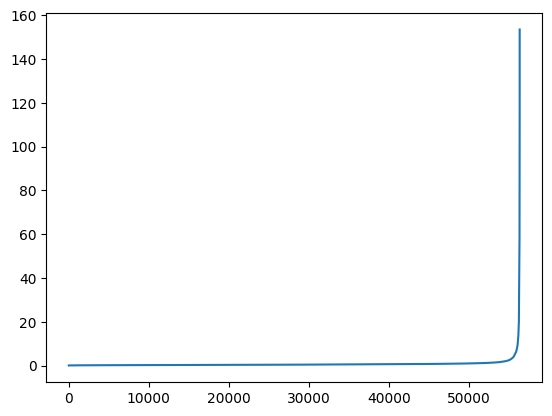

In [39]:
# Grafica de todos los limites (threshold)
plt.plot(threshold_rt[0:])
plt.show()

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = threshold_rt, y = precision_rt[1:], name = "Precision"))
fig.add_trace(go.Scatter(x = threshold_rt, y = recall_rt[1:], name = "Recall"))

fig.update_layout(
    title = 'Precision y Recall para diferentes umbrales', 
    xaxis_title = 'Umbral (threshold)', 
    yaxis_title = 'Precision/Recall', 
    hovermode="x unified"
)

fig.show()

In [41]:
threshold_fixed = 47

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 0].index.to_numpy(), 
                    y = error_df[error_df.True_class == 0].Reconstruction_error, 
                    mode = 'markers', 
                    name = 'Normal'))

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 1].index.to_numpy(), 
                    y = error_df[error_df.True_class == 1].Reconstruction_error, 
                    mode = 'markers', 
                    name = 'Fraude'))
fig.add_hline(threshold_fixed, annotation_text = 'Umbral fijo', line_dash = 'dash')

fig.update_layout(
    title = 'Error de reconstrucción para distintas clases', 
    yaxis_title = 'Error de Reconstrucción (MSE)', 
    xaxis_title = 'Índice del punto'
)
fig.show()

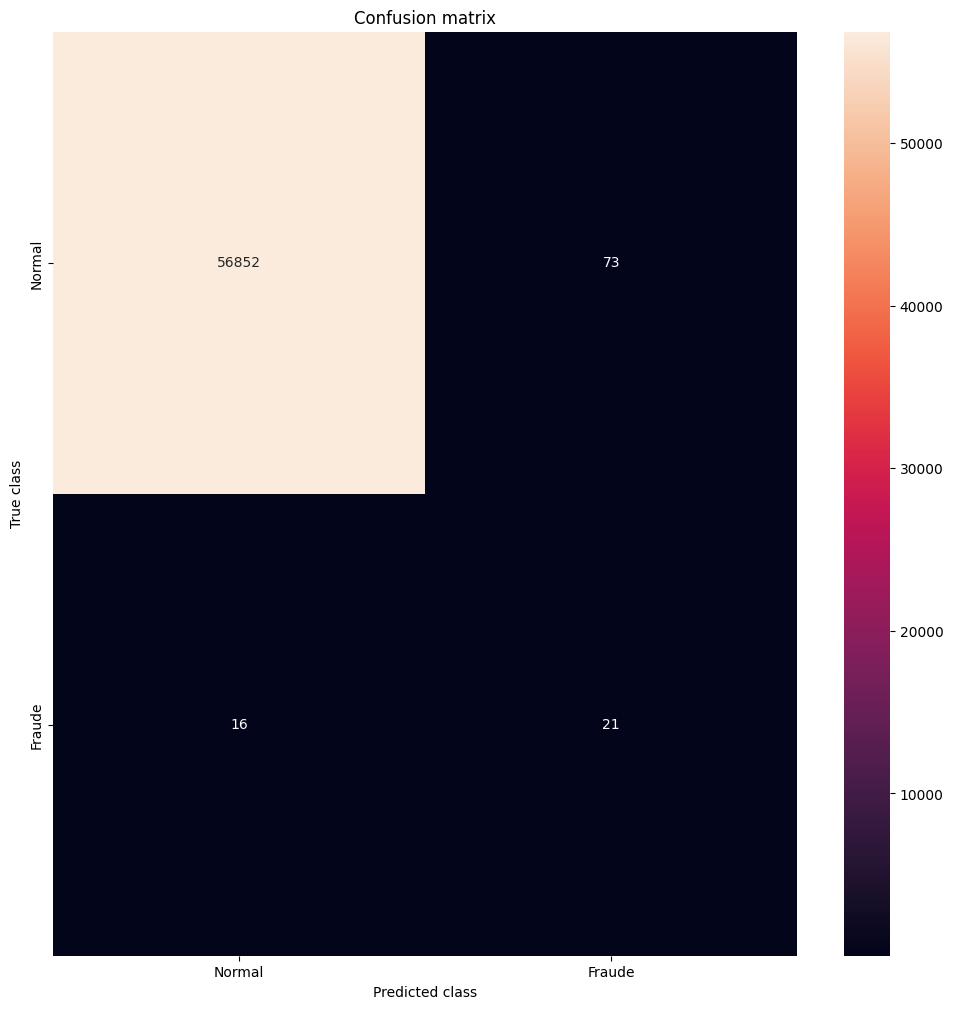

In [43]:
pred_y = [1 if e > 47 else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(pred_y, error_df.True_class)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print(classification_report(y_test, pred_y, digits = 4))

# Ejercicios

- Agregar más capas al encoder y/o al decoder y comparar los resultados obtenidos. Agregar muchas capas al modelo puede hacer que se sobreajuste. Una manera de mitigarlo es agregando regularización o capas Droupout. Si considera que su modelo tiene sobreajuste agregue cualquiera de las dos o elimine capas.
- ¿Cuál es la utilidad de las funciones de activación? ¿Qué operaciones hacen las distintas [funciones de activación que tiene Keras](https://keras.io/api/layers/activations/)?
- Pruebe con diferentes funciones de activación y evalue los resultados. Las funciones de activación que tiene el modelo son tanh (tangente hiperbólica) y ReLU (Rectified Linear Unit).

# Ligas

- [Post Original](https://blogs.oracle.com/ai-and-datascience/post/fraud-detection-using-autoencoders-in-keras-with-a-tensorflow-backend)

- Info. sobre pulir hiperparámetros (batch_size, learn_rate, epochs,...)
  
  *   https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/
  *   https://www.oreilly.com/library/view/natural-language-processing/9781484242674/

